 # Import Libraries 📚

In [3]:
#Import Packages
# essential libraries
import json
import random
from urllib.request import urlopen

# storing and anaysis
import numpy as np
import pandas as pd
import random 
import math

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
!pip install pywaffle
from pywaffle import Waffle

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   
from sklearn.preprocessing import LabelEncoder

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# Import Dataset 📁

In [4]:
#importation method 
path =  'https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data'
title=['ID','Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS','Alcohol','Amphet',' Amyl','Benzos','Caff','Canabis','Choc','Coke','Crack','Extasy','Heroin','Ketamine','Leghal','LSD','Meth','Mushrooms','Nicotine','sumer','VSA']
drug_consumption = pd.read_csv(path,sep=',',names=title)
drug_consumption.head()

ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

    Oscore   Ascore  ...  Extasy  Heroin  Ketamine Leghal  LSD Meth Mushrooms  \
0 -0.58331 -0.91699  ...     CL0     CL0       CL0    CL0  CL0  CL0       CL0   
1  1.43533  0.76096  ...     CL4     CL0       CL2    CL0  CL2  CL3       CL0   
2 -0.84732 -1.62090  ...     CL0     CL0       CL0    CL0  CL0  CL0       CL1   
3 -0.01928  0.59042  ...     CL0     CL0       CL2    CL0  CL0  CL0       CL0   
4 -0.45174 -0.30172  ...     CL1     CL0       CL0    CL1  CL0  CL0       CL2   

  Nicotine sumer  VSA  
0      CL2   CL0  CL0  
1      CL4   CL0  CL0  
2      CL0   CL0  CL0  
3      CL2   CL0  CL0  
4      CL2   CL0  CL0  

[5 rows x 32 columns]

In [5]:
drug_consumption.shape

(1885, 32)

In [6]:
drug_consumption.info()
drug_consumption.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15   Amyl      1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Canabis    1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

ID         Age       Gender    Education      Country  \
count  1885.000000  1885.00000  1885.000000  1885.000000  1885.000000   
mean    945.294960     0.03461    -0.000256    -0.003806     0.355542   
std     545.167641     0.87836     0.482588     0.950078     0.700335   
min       1.000000    -0.95197    -0.482460    -2.435910    -0.570090   
25%     474.000000    -0.95197    -0.482460    -0.611130    -0.570090   
50%     946.000000    -0.07854    -0.482460    -0.059210     0.960820   
75%    1417.000000     0.49788     0.482460     0.454680     0.960820   
max    1888.000000     2.59171     0.482460     1.984370     0.960820   

         Ethnicity       Nscore       Escore       Oscore       Ascore  \
count  1885.000000  1885.000000  1885.000000  1885.000000  1885.000000   
mean     -0.309577     0.000047    -0.000163    -0.000534    -0.000245   
std       0.166226     0.998106     0.997448     0.996229     0.997440   
min      -1.107020    -3.464360    -3.273930    -3.273930    -3.464360   
25%      -0.316850    -0.678250    -0.695090    -0.717270    -0.606330   
50%      -0.316850     0.042570     0.003320    -0.019280    -0.017290   
75%      -0.316850     0.629670     0.637790     0.723300     0.760960   
max       1.907250     3.273930     3.273930     2.901610     3.464360   

            Cscore    Impulsive           SS  
count  1885.000000  1885.000000  1885.000000  
mean     -0.000386     0.007216    -0.003292  
std       0.997523     0.954435     0.963701  
min      -3.464360    -2.555240    -2.078480  
25%      -0.652530    -0.711260    -0.525930  
50%      -0.006650    -0.217120     0.079870  
75%       0.584890     0.529750     0.765400  
max       3.464360     2.901610     1.921730

The dataset is made of 31 columns and 1885 rows. In the 31 columns, 18 are drugs, 7 are personality traits and 5 are demographic types.

#Data Exploration ✨
Categorise into the following columns:


*   Demographics
*   Personality
*   Legal & Illegal Drugs



In [7]:
demographic_columns = ['Age','Gender','Education','Country','Ethnicity']

personality_columns = ['Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS']

feature_columns = demographic_columns + personality_columns

drugs_columns = ['Alcohol','Amphet',' Amyl','Benzos','Caff','Canabis','Choc','Coke','Crack','Extasy','Heroin','Ketamine','Leghal','LSD','Meth','Mushrooms','Nicotine','sumer','VSA']

drugs_legal = ['Alcohol', 'Caff', 'Choc', 'Nicotine']

drugs_illegal = list(set(drugs_columns) - set(drugs_legal))

all_columns = feature_columns + drugs_columns

Since the dataset is already filled with numerical values, converting them to arguments to get a better visualization of the informations.

In [8]:
#dictionnary for the usage of drugs
using_dictionnary={
    'CL0': 'Never Used',
    'CL1': 'Used over a Decade Ago',
    'CL2': 'Used in Last Decade',
    'CL3': 'Used in Last Year',
    'CL4': 'Used in Last Month',
    'CL5': 'Used in Last Week',
    'CL6': 'Used in Last Day',
}
#dictionnary for the education
education_dictionnary={
    -2.43591: 'Left school before 16 years',
    -1.73790: 'Left school at 16 years',
    -1.43719: 'Left school at 17 years',
    -1.22751: 'Left school at 18 years',
    -0.61113: 'Some college or university, no certificate or degree',
    -0.05921: 'Professional certificate/ diploma',
     0.45468: 'University degree',
     1.16365: 'Masters degree',
     1.98437: 'Doctorate degree',
}
#dictionnary for the countries
country_dictionnary={
    -0.09765: 'Australia',
    0.24923: 'Canada',
    -0.46841: 'New Zealand',
    -0.28519: 'Other',
    0.21128: 'Republic of Ireland',
    0.96082: 'UK',
    -0.57009: 'USA',
}
#dictionnary for the ethnicities
ethnicity_dictionnary={
    -0.50212: 'Asian',
    -1.10702: 'Black',
    1.90725: 'Mixed-Black/Asian',
    0.12600: 'Mixed-White/Asian',
    -0.22166: 'Mixed-White/Black',
     0.11440: 'Other',
    -0.31685: 'White',

}
#dictionnary for the ages
age_dictionnary={
    -0.95197: '18-24',
    -0.07854: '25-34',
    0.49788: '35-44',
    1.09449: '45-54',
    1.82213: '55-64',
    2.59171: '65+',
}
#dictionnary for the genders
gender_dictionnary={
    0.48246: 'Female',
    -0.48246: 'Male',

}
#dictionnary for splitting the drugs usage in two groups : User & Non-user
user_dictionnary={
    'CL6': 'User',
    'CL5': 'User',
    'CL4': 'User',
    'CL3': 'User',
    'CL2': 'Non-user',
    'CL1': 'Non-user',
    'CL0': 'Non-user',

}

In [9]:
#Let's create the drug_consumption_viz dataset
drug_consumption_viz=drug_consumption.copy() 
drug_consumption_viz['Education'] = list(map(lambda x : education_dictionnary[round(x, 6)] ,drug_consumption['Education']))
drug_consumption_viz['Country'] = list(map(lambda x : country_dictionnary[round(x, 6)] ,drug_consumption['Country']))
drug_consumption_viz['Ethnicity'] = list(map(lambda x : ethnicity_dictionnary[round(x, 6)] ,drug_consumption['Ethnicity']))
drug_consumption_viz['Age'] = list(map(lambda x : age_dictionnary[round(x, 6)] ,drug_consumption['Age']))
drug_consumption_viz['Gender'] = list(map(lambda x : gender_dictionnary[round(x, 6)] ,drug_consumption['Gender']))

In [10]:
drug_consumption_viz.head()

ID    Age  Gender                          Education Country  \
0   1  35-44  Female  Professional certificate/ diploma      UK   
1   2  25-34    Male                   Doctorate degree      UK   
2   3  35-44    Male  Professional certificate/ diploma      UK   
3   4  18-24  Female                     Masters degree      UK   
4   5  35-44  Female                   Doctorate degree      UK   

           Ethnicity   Nscore   Escore   Oscore   Ascore  ...  Extasy  Heroin  \
0  Mixed-White/Asian  0.31287 -0.57545 -0.58331 -0.91699  ...     CL0     CL0   
1              White -0.67825  1.93886  1.43533  0.76096  ...     CL4     CL0   
2              White -0.46725  0.80523 -0.84732 -1.62090  ...     CL0     CL0   
3              White -0.14882 -0.80615 -0.01928  0.59042  ...     CL0     CL0   
4              White  0.73545 -1.63340 -0.45174 -0.30172  ...     CL1     CL0   

   Ketamine Leghal  LSD Meth Mushrooms Nicotine sumer  VSA  
0       CL0    CL0  CL0  CL0       CL0      CL2   CL0  CL0  
1       CL2    CL0  CL2  CL3       CL0      CL4   CL0  CL0  
2       CL0    CL0  CL0  CL0       CL1      CL0   CL0  CL0  
3       CL2    CL0  CL0  CL0       CL0      CL2   CL0  CL0  
4       CL0    CL1  CL0  CL0       CL2      CL2   CL0  CL0  

[5 rows x 32 columns]

# Examine the usage of drugs

In [11]:
#library bokeh
from math import pi
from bokeh.palettes import Category20c
from bokeh.plotting import figure, show
from bokeh.transform import cumsum
from bokeh.io import output_notebook
from bokeh.resources import INLINE
output_notebook(INLINE)

drug_consumption_viz[drugs_columns[0]] = list(map(lambda x : using_dictionnary[x] ,drug_consumption[drugs_columns[0]])) # we map our numerical values to categorical using our dictionnary
data = drug_consumption_viz[drugs_columns[0]].value_counts().reset_index(name='value').rename(columns={'index': 'usage'}) #we reset and rename index for easier usage of the bokeh library
data['angle'] = data['value']/data['value'].sum() * 2*pi #angle of values we are going to plot 
data['color'] = Category20c[len(data)] #different colors for each value

#figure informations :
p = figure(height=350, title="Usage of Alcohol", toolbar_location=None, tools="hover", tooltips="@usage: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),line_color="white", fill_color='color', legend_field='usage', source=data)

#plot figure
p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None
show(p)

Loading BokehJS ...

The pie chart shows that the Alchool consumption is mostly a daily up to a weekly consumption, which is not suprising for a legal drug.

Let's examine now this use for all of the others drugs:

In [12]:
#for a better visualization, this method return the list of colors needed for each plot in function of the usage 
def get_list_color(list,color):
  color_output=[]
  for i in list:
   for kv in color.items():
    if i==kv[0] : color_output.append(kv[1]) 
  return  color_output

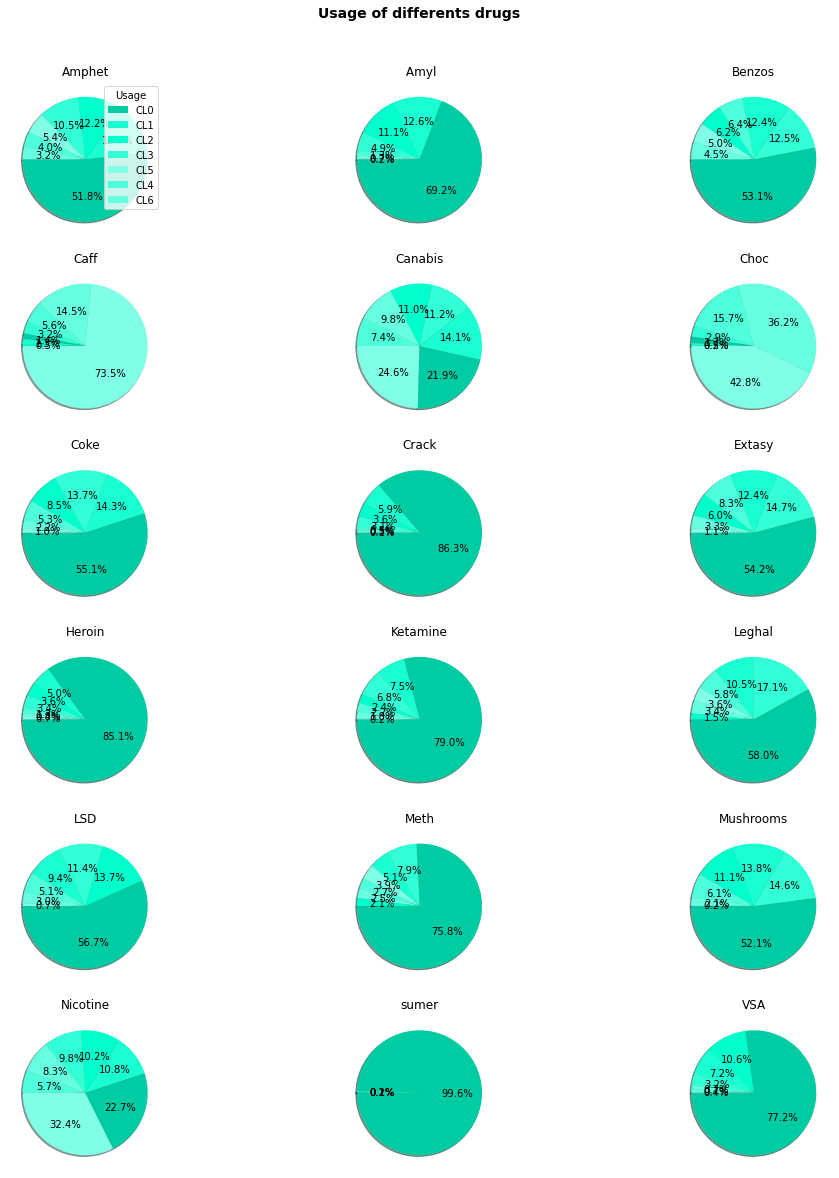

In [13]:
#multiplot with matplotlib
color= {'CL0':  '#00cca3',
           'CL1':  '#00ffcc',
           'CL2':  '#1affd1',
           'CL3':  '#33ffd6',
           'CL4':  '#4dffdb',
           'CL5':  '#66ffe0',
           'CL6':  '#80ffe6'}
fig, axes = plt.subplots(6,3 ,figsize = (16,16))
fig.suptitle('Usage of differents drugs',fontsize=14, y=1.02,weight='black')  
#color=['#00cca3','#00ffcc','#1affd1','#33ffd6','#4dffdb','#66ffe0','#80ffe6']
k=1
for i in range(6):
    for j in range(3):
        labels = drug_consumption[drugs_columns[k]].value_counts().index.tolist()
        axes[i][j].pie(x=drug_consumption[drugs_columns[k]].value_counts(), autopct='%.1f%%', shadow=True, startangle=180,colors=get_list_color(labels,color))
        axes[i][j].set_title(drugs_columns[k])
        k+=1

axes[0][0].legend(title='Usage',labels=labels)
plt.tight_layout()
plt.show()

We can see that there is a few illegal drugs that have the highest rate of 'never used', such as Ketamine, Meth, Heroin and Crack with almost 80%. Otherwise, for each drugs almost half of the participants never tried it except for the canabis which only have ~22% of "Never used". In the legal drugs we can see that almost 75% of the participants have a daily use of Coffee which is interesting regarding the effect Coffe is well known for such as " insomnia, nervousness, restlessness, nausea, increased heart rate, and other side effects. Larger doses might cause headache, anxiety, and chest pain ".

In [14]:
#Splitting for each drugs the User/Non-user
for i in range(len(drugs_columns)):
  drug_consumption_viz[drugs_columns[i]] = list(map(lambda x : user_dictionnary[x] ,drug_consumption[drugs_columns[i]]))

In [15]:
output_notebook(INLINE)
data = drug_consumption_viz[drugs_columns[0]].value_counts().reset_index(name='value').rename(columns={'index': 'usage'}) #we reset and rename index for easier usage of the bokeh library
data['angle'] = data['value']/data['value'].sum() * 2*pi #angle of values we are going to plot 
data['color'] = ['#006d77','#83c5be'] #different colors for each value

#figure informations :
p = figure(height=350, title="Usage of Alchool User/Non-user", toolbar_location=None, tools="hover", tooltips="@usage: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),line_color="white", fill_color='color', legend_field='usage', source=data)

#plot figure
p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None
show(p)

Loading BokehJS ...

We can observe that the illegal drug is highly used. Now, let's see the user/non-user repartition for the other drugs:

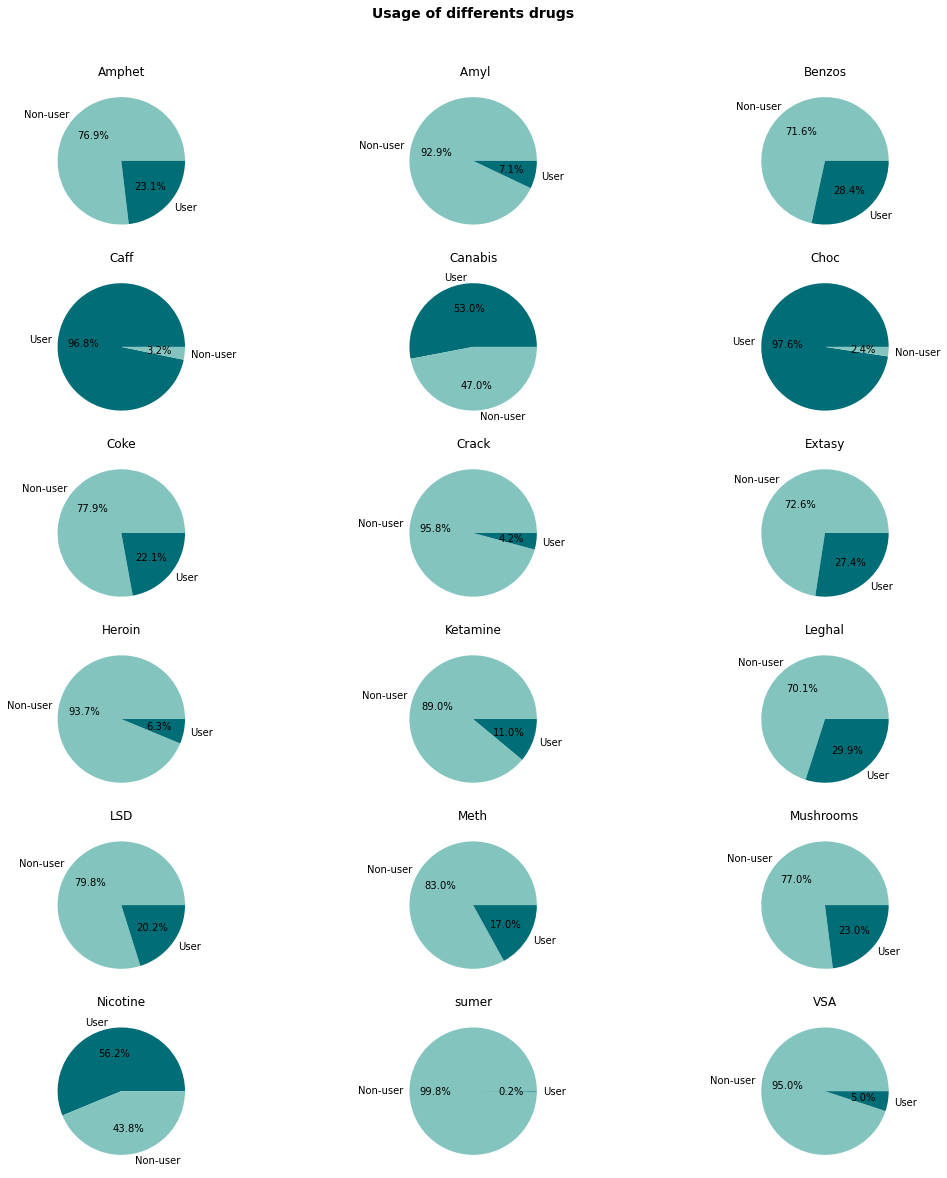

In [16]:
#if categories :
color = {'User':  '#006d77',
          'Non-user': '#83c5be'}

fig, axes = plt.subplots(6,3,figsize = (16,16))
fig.suptitle('Usage of differents drugs',fontsize=14, y=1.02,weight='black')  
k=1
for i in range(6):
    for j in range(3):
        labels = drug_consumption_viz[drugs_columns[k]].value_counts().index.tolist()
        axes[i][j].pie(x=drug_consumption_viz[drugs_columns[k]].value_counts(), autopct='%.1f%%', shadow=False,labels=labels,colors=get_list_color(labels,color))
        axes[i][j].set_title(drugs_columns[k])
        k+=1

#axes[0][0].legend(title='Usage',labels=['Used','Never used'])
plt.tight_layout()
plt.show()

We may see a wide range of user/non-user representations for illicit and legal substances. To begin, we can detect a tiny percentage of cheaters (0.2%), but we will remove this column from our future forecast because it may create noise. Then we can observe that the most commonly used illicit substance is Cannabis, which has up to 47% of users and is recognized as a getaway drug.

* A gateway drug is a habit-forming substance that can lead to the usage of more addictive substances in the future. Alcohol, marijuana, nicotine, and prescription medications are among them.



It would be fascinating to examine how users of various categories are distributed over the entire dataset.

Consumer vs Non-consumer

In [17]:
drugs_illegal[:-1] #we take all ilegal drugs except sumer

# for the next part of our data let's create two more catgories
#get the max of consumption for each illegal druf for an individual
drug_consumption['Illegal drug use']=drug_consumption[drugs_illegal[:-1]].max(axis=1)
drug_consumption_viz['Illegal drug use']=drug_consumption[drugs_illegal[:-1]].max(axis=1)
#print(drug_consumption.loc[drug_consumption['Illegal drug use'] == 'CL0'])
#do the almost the same but paritionning betwenn user/non-user
drug_consumption['Illegal drug user/non-user']=drug_consumption_viz[drugs_illegal[:-1]].max(axis=1)
drug_consumption_viz['Illegal drug user/non-user']=drug_consumption_viz[drugs_illegal[:-1]].max(axis=1)
#print(drug_consumption_ml.loc[drug_consumption_ml['Illegal drug user/non-user'] == 'Non-user'])

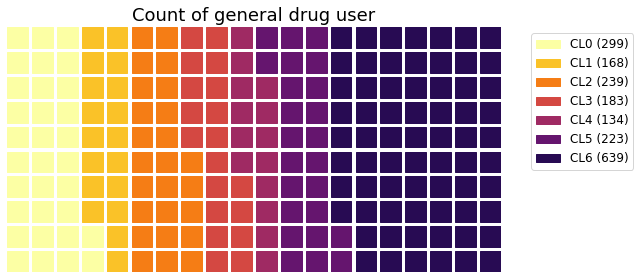

In [18]:
#waffle chart
#Propottion of drug user within the whole dataset
df = drug_consumption.groupby('Illegal drug use').size().reset_index(name='counts')
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': df['counts'],
            'labels': ["{0} ({1})".format(n[1], n[2]) for n in df[['Illegal drug use', 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': 'Count of general drug user', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=10,
    columns=20,
    colors=colors,
    figsize=(9, 9)
)


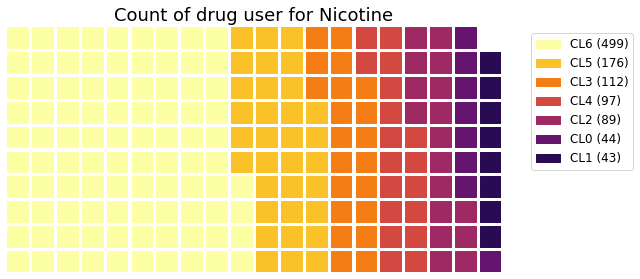

In [19]:
#Getaway drug analysis : Nicotine
df =drug_consumption_viz[drug_consumption_viz['Nicotine']=='User']['Illegal drug use'].value_counts().to_frame()
df=df.reset_index()
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': df['Illegal drug use'],
             'labels': ["{0} ({1})".format(n[1], n[2]) for n in df[['index','Illegal drug use']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': 'Count of drug user for Nicotine', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=10,
    columns=20,
    colors=colors,
    figsize=(9, 9)
)

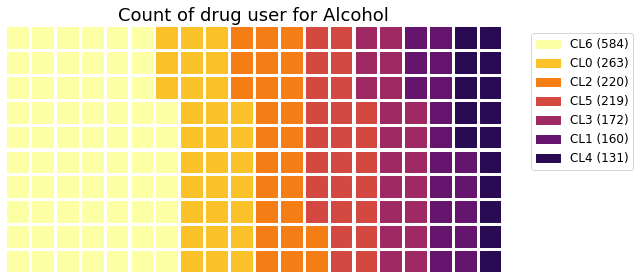

In [20]:
#Getaway drug analysis : Alcohol
df =drug_consumption_viz[drug_consumption_viz['Alcohol']=='User']['Illegal drug use'].value_counts().to_frame()
df=df.reset_index()
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': df['Illegal drug use'],
             'labels': ["{0} ({1})".format(n[1], n[2]) for n in df[['index','Illegal drug use']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': 'Count of drug user for Alcohol', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=10,
    columns=20,
    colors=colors,
    figsize=(9, 9)
)

We can notice that the getaway drugs Nicotine and Alcohol have a higher percentage of illicit drug users. However, because we didn't receive a timeframe for each participant's use, it's difficult to establish if the use of alchool influences the usage of Amphets, or vice versa. We'll look at those relationships in further depth in the Machine Learning section, but it appears that Nicotine or Alchool use is highly linked to the use of other illicit substances.


## Demographic data

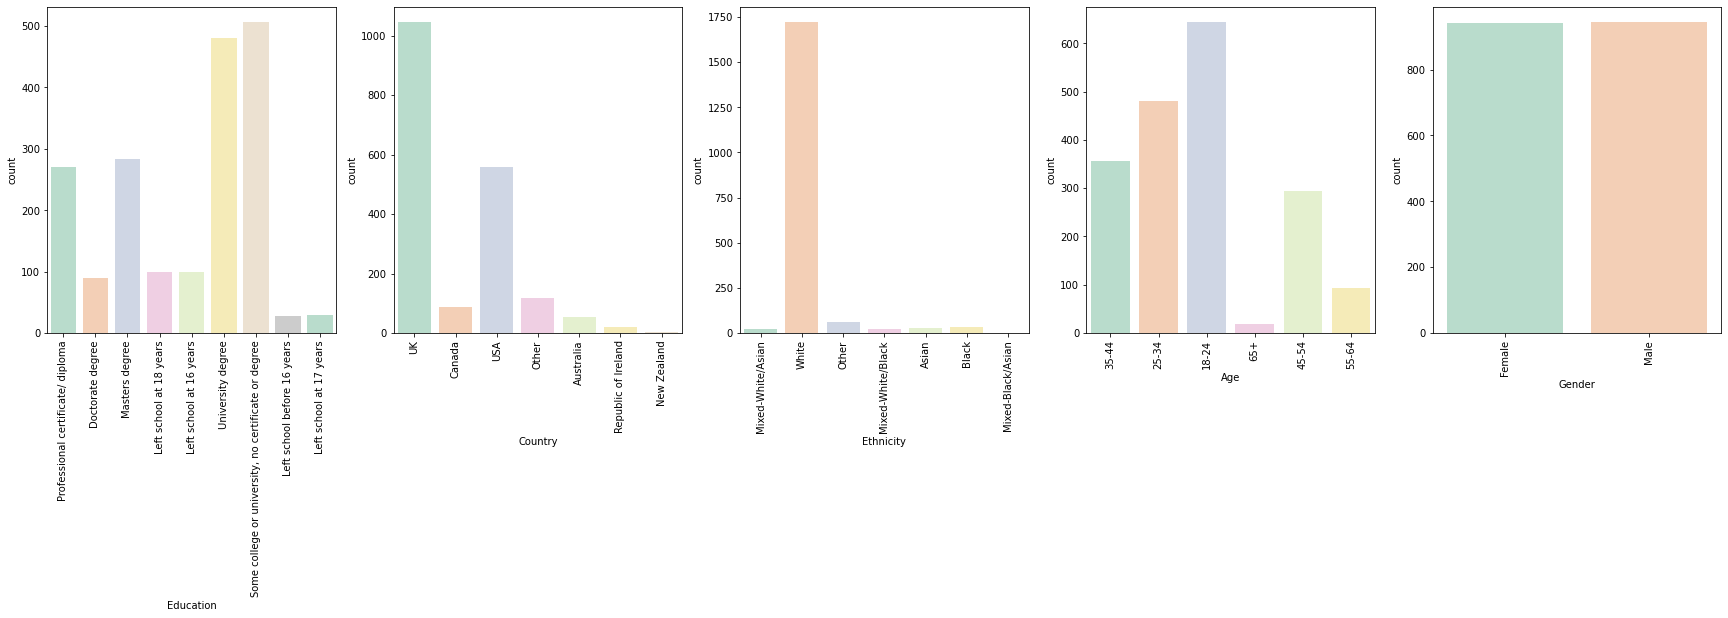

In [21]:
#demographic data
demographic_columns_name=['Education','Country','Ethnicity','Age','Gender']
fig, ax =plt.subplots(1,5,figsize=(30,6))
k=0
for i in range(5):
  color=sns.color_palette("Pastel2")
  sns.countplot(data=drug_consumption_viz,x=demographic_columns_name[k],ax=ax[i],palette=color)
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90,fontsize=10)
  k+=1

plt.show()

Some categories, such as Education and Age, are virtually uniformly divergent, while others, such as Gender, are almost evenly represented. Within the Dataframe's columns, we can see certain unequally represented categories, such as Ethnicity, which has up to 90% white participants, and Country, which has predominantly UK participants.

In [22]:
percent_df_country = (drug_consumption_viz[demographic_columns_name[1]].value_counts()/drug_consumption_viz[demographic_columns_name[1]].count())*100
percent_df_country.to_frame()

Country
UK                   55.384615
USA                  29.549072
Other                 6.259947
Canada                4.615385
Australia             2.864721
Republic of Ireland   1.061008
New Zealand           0.265252

In [23]:
percent_df_ethnicity = (drug_consumption_viz[demographic_columns_name[2]].value_counts()/drug_consumption_viz[demographic_columns_name[2]].count())*100
percent_df_ethnicity.to_frame()

Ethnicity
White              91.246684
Other               3.342175
Black               1.750663
Asian               1.379310
Mixed-White/Asian   1.061008
Mixed-White/Black   1.061008
Mixed-Black/Asian   0.159151

In [24]:
#How much fraud is there
percent_df_frauds = (drug_consumption_viz['sumer'].value_counts()/drug_consumption_viz['sumer'].count())*100
percent_df_frauds.to_frame()

sumer
Non-user  99.840849
User       0.159151

We can see that there is a huge difference in the peoples represented in the dataset , they are mainly white from 18-24 from UK and mostly educated. The only demographic column that doesn't show a huge difference in his categories is the Gender. We can observe an alomst 50/50 repartition of the male/female.


Let's study in details the parameters of user/ non user :

* user/non-user by age
* user/non-user by gender
* user/non-user by education level

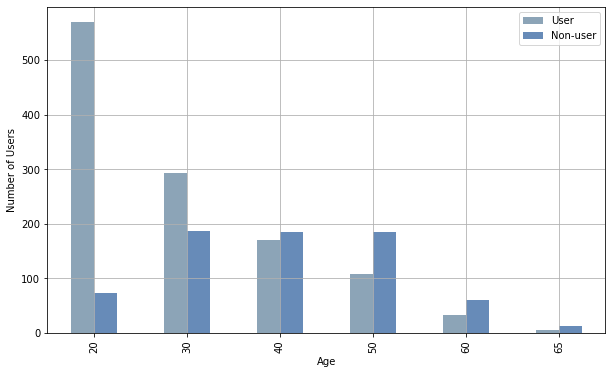

In [25]:
age=pd.concat([drug_consumption_viz[drug_consumption_viz['Illegal drug user/non-user'] == 'User']['Age'].value_counts(),drug_consumption_viz[drug_consumption_viz['Illegal drug user/non-user'] == 'Non-user']['Age'].value_counts()],axis=1,keys=['User','Non-user'])
age.rename(index={'18-24': '20','25-34': '30','35-44': '40','45-54': '50','55-64': '60','65+': '65'})

AgePlot = age.plot(kind='bar',figsize=(10,6),alpha=0.6,grid=True,color=['#406788','#023e8a'])
AgePlot.set(ylabel = 'Number of Users', xlabel='Age')

AgeLabels = ['20','30','40','50','60','65']
AgePlot.set_xticklabels(AgeLabels)
AgePlot;

Users are mostly in their twenties. We can observe that as the population ages, the average number of users appears to drop. As a result, illegal drug use is adversely associated to age. But don't forget about the wide range of results that might lead to a mistaken conclusion.

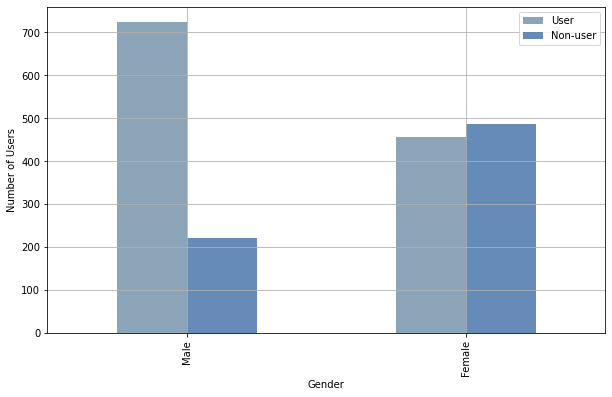

In [26]:
gender=pd.concat([drug_consumption_viz[drug_consumption_viz['Illegal drug user/non-user'] == 'User']['Gender'].value_counts(),drug_consumption_viz[drug_consumption_viz['Illegal drug user/non-user'] == 'Non-user']['Gender'].value_counts()],axis=1,keys=['User','Non-user'])

GenderPlot = gender.plot(kind='bar',figsize=(10,6),alpha=0.6,grid=True,color=['#406788','#023e8a'])
GenderPlot.set(ylabel = 'Number of Users', xlabel='Gender')

GenderLabels = ['Male','Female']
GenderPlot.set_xticklabels(GenderLabels)
GenderPlot;


The repatition of the user/non-user by gender shows a majority of male users compared to the range of female users.

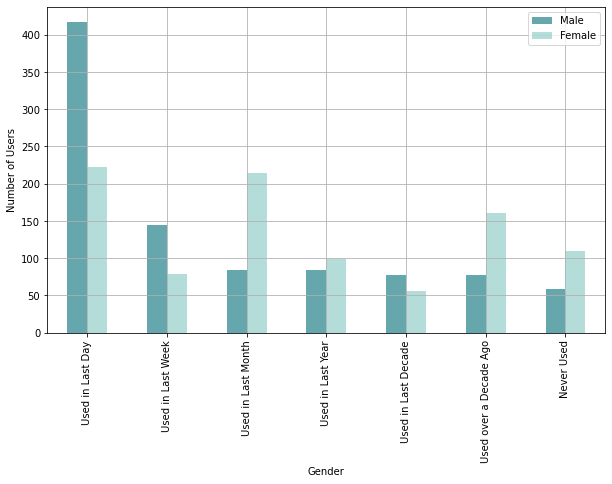

In [27]:
gender=pd.concat([drug_consumption_viz[drug_consumption_viz['Gender'] == 'Male']['Illegal drug use'].value_counts(),drug_consumption_viz[drug_consumption_viz['Gender'] == 'Female']['Illegal drug use'].value_counts()],axis=1,keys=['Male','Female'])

GenderPlot = gender.plot(kind='bar',figsize=(10,6),alpha=0.6,grid=True,color=['#006d77','#83c5be'])
GenderPlot.set(ylabel = 'Number of Users', xlabel='Gender')

GenderLabels = ['Used in Last Day','Used in Last Week','Used in Last Month','Used in Last Year','Used in Last Decade','Used over a Decade Ago','Never Used']
GenderPlot.set_xticklabels(GenderLabels)
GenderPlot;

We can draw some generalizations from this plot since men and women are equally represented. We can observe that there is a gender difference in terms of utilization. Men account for the majority of daily drug users, whereas women account for the majority of all other types of usage.

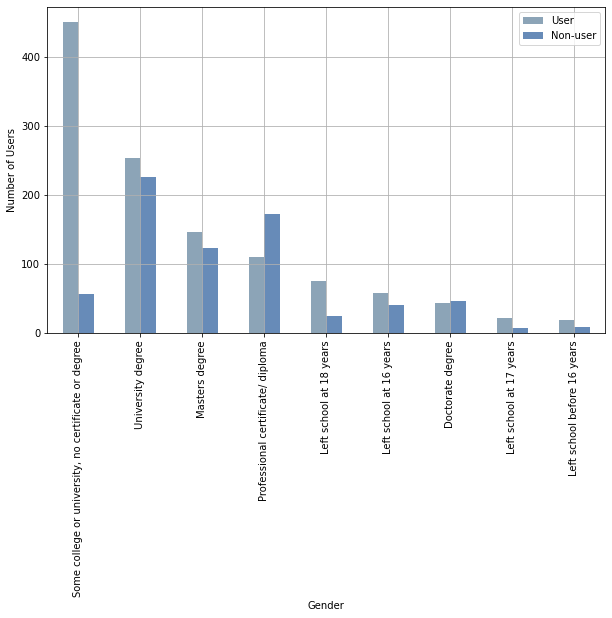

In [28]:
#user/non-user by education level
education=pd.concat([drug_consumption_viz[drug_consumption_viz['Illegal drug user/non-user'] == 'User']['Education'].value_counts(),drug_consumption_viz[drug_consumption_viz['Illegal drug user/non-user'] == 'Non-user']['Education'].value_counts()],axis=1,keys=['User','Non-user'])

EducationPlot = education.plot(kind='bar',figsize=(10,6),alpha=0.6,grid=True,color=['#406788','#023e8a'])
EducationPlot.set(ylabel = 'Number of Users', xlabel='Gender')

EducationLabels = ['Some college or university, no certificate or degree','University degree','Masters degree','Professional certificate/ diploma','Left school at 18 years','Left school at 16 years','Doctorate degree','Left school at 17 years','Left school before 16 years']
EducationPlot.set_xticklabels(EducationLabels)
EducationPlot;

We can see that the majority of the user have a good education level.

# Personality traits

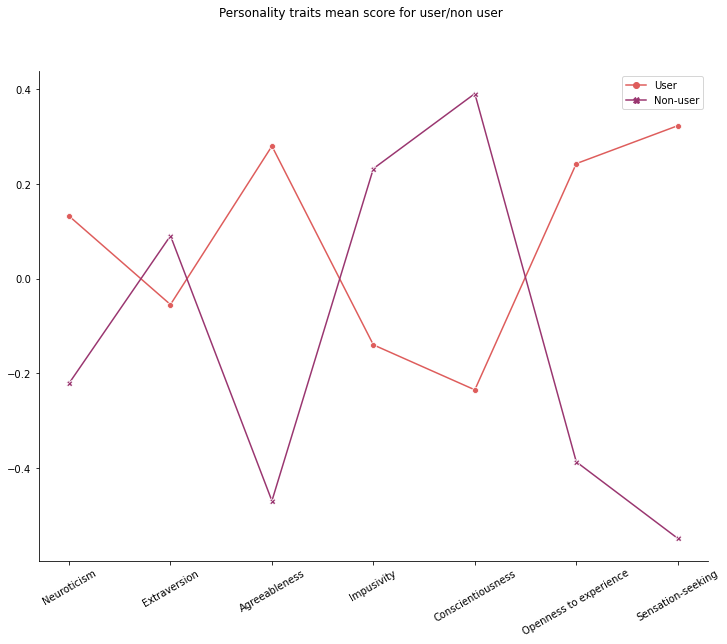

In [29]:
#Personality traits score for user/non user 
#lets create a  new dataframe for an easier plot
rows = []
for i in personality_columns :
    rows.append([drug_consumption_viz[drug_consumption_viz['Illegal drug user/non-user'] == 'User'][i].mean(), drug_consumption_viz[drug_consumption_viz['Illegal drug user/non-user'] == 'Non-user'][i].mean()])
df = pd.DataFrame(rows, columns=["User", "Non-user"],index=['Neuroticism','Extraversion','Agreeableness','Impusivity','Conscientiousness','Openness to experience','Sensation-seeking']) 

#Let's plot this new dataframe
fig, ax = plt.subplots()
fig.suptitle('Personality traits mean score for user/non user ')
fig.set_size_inches(12, 9)
sns.lineplot(data=df,markers=True, dashes=False, palette="flare",sizes=(.25, 2.5))
ax.tick_params(axis='x', rotation=30)
sns.despine()

We plotted the mean score for each personality feature for consumers and non-consumers by generating a new column depending on yearly illicit substance intake. Although there appears to be a substantial link between consumption and modifying behavior, personality attributes appear to be diametrically opposite. It's intriguing since we may claim that the usage of drugs alters the participants' behavior. The question of how changes in personality will influence how we create our ML model later.

# Correlation between the features
We need numeral data for an heatmap

In [30]:
for i in drugs_columns:
    drug_consumption[i] = drug_consumption[i].map({'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6})

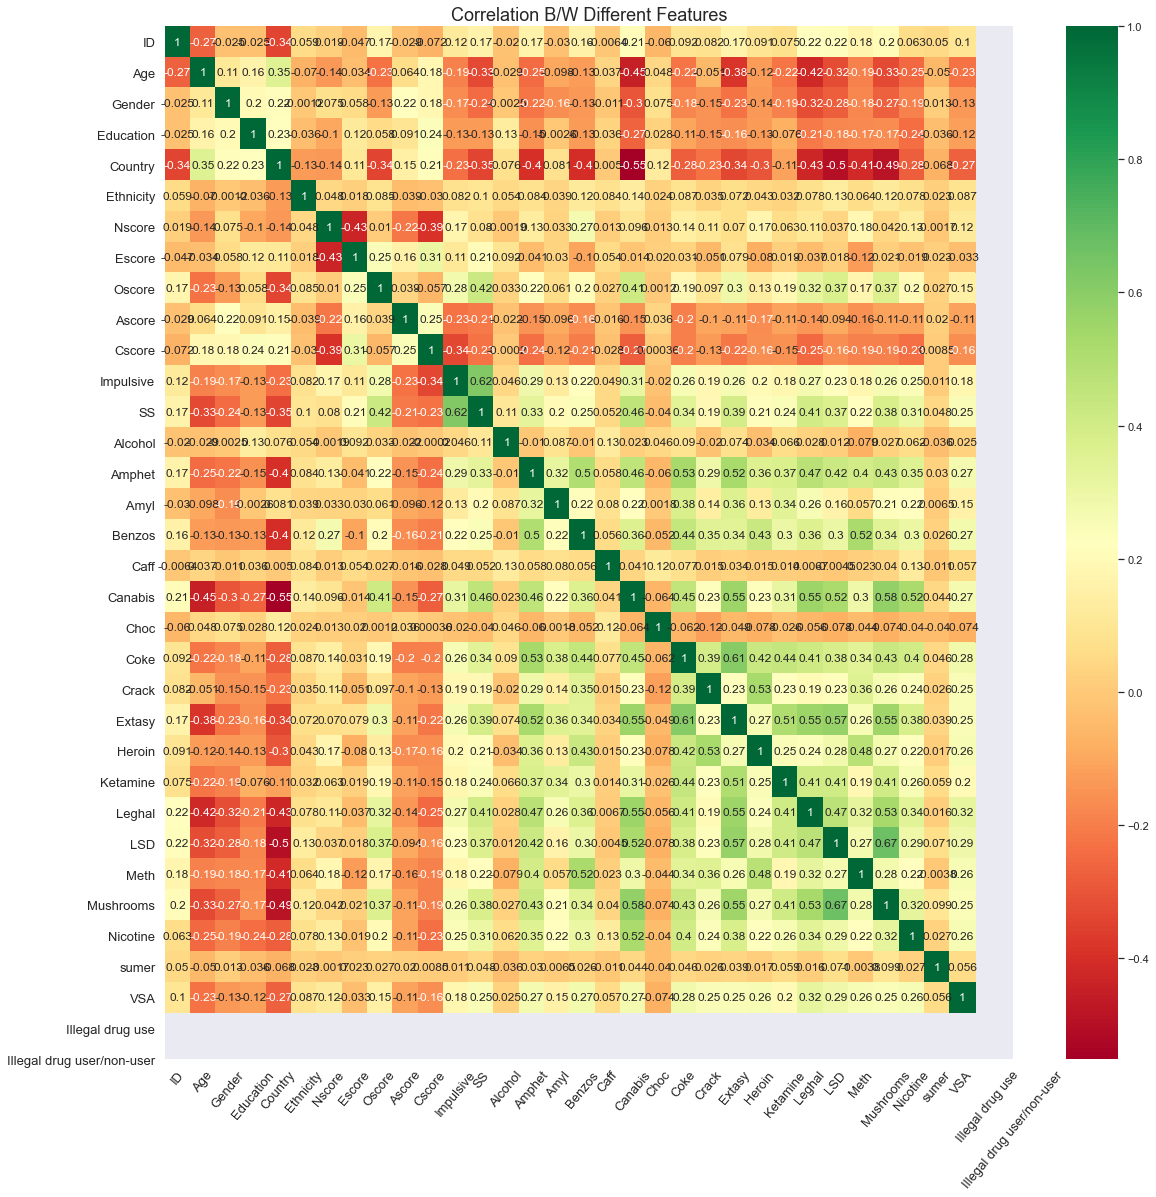

In [31]:
#drugs data
corrmat = drug_consumption.corr()

plt.figure(figsize=(19,19))

sns.set(font_scale=1)
hm = sns.heatmap(corrmat,cmap = 'RdYlGn',annot=True,yticklabels = drug_consumption.columns, xticklabels = drug_consumption.columns)
plt.xticks(fontsize=13,rotation=50)
plt.yticks(fontsize=13)
plt.title("Correlation B/W Different Features",fontsize=18)
plt.show()

# Cleaning Data (ML prep) 🦾

Reload the dataset.

In [32]:
path =  'https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data'
title=['ID','Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS','Alcohol','Amphet',' Amyl','Benzos','Caff','Canabis','Choc','Coke','Crack','Extasy','Heroin','Ketamine','Leghal','LSD','Meth','Mushrooms','Nicotine','sumer','VSA']
drug_consumption = pd.read_csv(path,sep=',',names=title)
drug_consumption.head()

ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

    Oscore   Ascore  ...  Extasy  Heroin  Ketamine Leghal  LSD Meth Mushrooms  \
0 -0.58331 -0.91699  ...     CL0     CL0       CL0    CL0  CL0  CL0       CL0   
1  1.43533  0.76096  ...     CL4     CL0       CL2    CL0  CL2  CL3       CL0   
2 -0.84732 -1.62090  ...     CL0     CL0       CL0    CL0  CL0  CL0       CL1   
3 -0.01928  0.59042  ...     CL0     CL0       CL2    CL0  CL0  CL0       CL0   
4 -0.45174 -0.30172  ...     CL1     CL0       CL0    CL1  CL0  CL0       CL2   

  Nicotine sumer  VSA  
0      CL2   CL0  CL0  
1      CL4   CL0  CL0  
2      CL0   CL0  CL0  
3      CL2   CL0  CL0  
4      CL2   CL0  CL0  

[5 rows x 32 columns]

Divided drug use into two categories: users and non-users. If the substance was taken during the previous year, the individual is deemed a user, otherwise, the individual is considered a non-user.

In [33]:
drug_consumption['Illegal drug user/non-user']=drug_consumption_viz[drugs_illegal[:-1]].max(axis=1)

In [34]:
drug_consumption.isnull().sum() #0 there is no missing value

ID                            0
Age                           0
Gender                        0
Education                     0
Country                       0
Ethnicity                     0
Nscore                        0
Escore                        0
Oscore                        0
Ascore                        0
Cscore                        0
Impulsive                     0
SS                            0
Alcohol                       0
Amphet                        0
 Amyl                         0
Benzos                        0
Caff                          0
Canabis                       0
Choc                          0
Coke                          0
Crack                         0
Extasy                        0
Heroin                        0
Ketamine                      0
Leghal                        0
LSD                           0
Meth                          0
Mushrooms                     0
Nicotine                      0
sumer                         0
VSA     

In [35]:
#encoding because most of our machine learning codes do not understand categorical data
for i in drugs_columns:
    drug_consumption[i] = drug_consumption[i].map({'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6})

In [36]:
# because our variables Age,Gender,... should be categorical, let's change their type 
for i in (demographic_columns+drugs_legal):
  drug_consumption[i]=drug_consumption[i].astype('category')

In [37]:
#we can drop countries
drug_consumption_ml=drug_consumption.copy()
#we drop the ID because it do not provide any important information
drug_consumption_ml.drop(['ID'], axis = 1,inplace=True)
#we drop all values in the illegal drug columns (because it is our output)
drug_consumption_ml.drop(drugs_illegal, axis = 1,inplace=True)
drug_consumption_ml

Age   Gender Education  Country Ethnicity   Nscore   Escore  \
0     0.49788  0.48246  -0.05921  0.96082   0.12600  0.31287 -0.57545   
1    -0.07854 -0.48246   1.98437  0.96082  -0.31685 -0.67825  1.93886   
2     0.49788 -0.48246  -0.05921  0.96082  -0.31685 -0.46725  0.80523   
3    -0.95197  0.48246   1.16365  0.96082  -0.31685 -0.14882 -0.80615   
4     0.49788  0.48246   1.98437  0.96082  -0.31685  0.73545 -1.63340   
...       ...      ...       ...      ...       ...      ...      ...   
1880 -0.95197  0.48246  -0.61113 -0.57009  -0.31685 -1.19430  1.74091   
1881 -0.95197 -0.48246  -0.61113 -0.57009  -0.31685 -0.24649  1.74091   
1882 -0.07854  0.48246   0.45468 -0.57009  -0.31685  1.13281 -1.37639   
1883 -0.95197  0.48246  -0.61113 -0.57009  -0.31685  0.91093 -1.92173   
1884 -0.95197 -0.48246  -0.61113  0.21128  -0.31685 -0.46725  2.12700   

       Oscore   Ascore   Cscore  Impulsive       SS Alcohol Caff Choc  \
0    -0.58331 -0.91699 -0.00665   -0.21712 -1.18084       5    6    5   
1     1.43533  0.76096 -0.14277   -0.71126 -0.21575       5    6    6   
2    -0.84732 -1.62090 -1.01450   -1.37983  0.40148       6    6    4   
3    -0.01928  0.59042  0.58489   -1.37983 -1.18084       4    5    4   
4    -0.45174 -0.30172  1.30612   -0.21712 -0.21575       4    6    6   
...       ...      ...      ...        ...      ...     ...  ...  ...   
1880  1.88511  0.76096 -1.13788    0.88113  1.92173       5    4    4   
1881  0.58331  0.76096 -1.51840    0.88113  0.76540       5    5    4   
1882 -1.27553 -1.77200 -1.38502    0.52975 -0.52593       4    6    6   
1883  0.29338 -1.62090 -2.57309    1.29221  1.22470       5    6    5   
1884  1.65653  1.11406  0.41594    0.88113  1.22470       4    6    6   

     Nicotine Illegal drug user/non-user  
0           2                   Non-user  
1           4                       User  
2           0                       User  
3           2                       User  
4           2                       User  
...       ...                        ...  
1880        0                       User  
1881        5                       User  
1882        6                       User  
1883        4                       User  
1884        6                       User  

[1885 rows x 17 columns]

In [38]:
#In order to get a binary output 
def binary_transformation(Y):
  for x in range(len(Y)):
   if(Y[x]=='User'):Y[x]=1
   else :Y[x]=0 
  return Y.astype('int')
drug_consumption_ml['Illegal drug user/non-user']=binary_transformation(drug_consumption_ml['Illegal drug user/non-user'])

In [39]:
drug_consumption_ml

Age   Gender Education  Country Ethnicity   Nscore   Escore  \
0     0.49788  0.48246  -0.05921  0.96082   0.12600  0.31287 -0.57545   
1    -0.07854 -0.48246   1.98437  0.96082  -0.31685 -0.67825  1.93886   
2     0.49788 -0.48246  -0.05921  0.96082  -0.31685 -0.46725  0.80523   
3    -0.95197  0.48246   1.16365  0.96082  -0.31685 -0.14882 -0.80615   
4     0.49788  0.48246   1.98437  0.96082  -0.31685  0.73545 -1.63340   
...       ...      ...       ...      ...       ...      ...      ...   
1880 -0.95197  0.48246  -0.61113 -0.57009  -0.31685 -1.19430  1.74091   
1881 -0.95197 -0.48246  -0.61113 -0.57009  -0.31685 -0.24649  1.74091   
1882 -0.07854  0.48246   0.45468 -0.57009  -0.31685  1.13281 -1.37639   
1883 -0.95197  0.48246  -0.61113 -0.57009  -0.31685  0.91093 -1.92173   
1884 -0.95197 -0.48246  -0.61113  0.21128  -0.31685 -0.46725  2.12700   

       Oscore   Ascore   Cscore  Impulsive       SS Alcohol Caff Choc  \
0    -0.58331 -0.91699 -0.00665   -0.21712 -1.18084       5    6    5   
1     1.43533  0.76096 -0.14277   -0.71126 -0.21575       5    6    6   
2    -0.84732 -1.62090 -1.01450   -1.37983  0.40148       6    6    4   
3    -0.01928  0.59042  0.58489   -1.37983 -1.18084       4    5    4   
4    -0.45174 -0.30172  1.30612   -0.21712 -0.21575       4    6    6   
...       ...      ...      ...        ...      ...     ...  ...  ...   
1880  1.88511  0.76096 -1.13788    0.88113  1.92173       5    4    4   
1881  0.58331  0.76096 -1.51840    0.88113  0.76540       5    5    4   
1882 -1.27553 -1.77200 -1.38502    0.52975 -0.52593       4    6    6   
1883  0.29338 -1.62090 -2.57309    1.29221  1.22470       5    6    5   
1884  1.65653  1.11406  0.41594    0.88113  1.22470       4    6    6   

     Nicotine  Illegal drug user/non-user  
0           2                           0  
1           4                           1  
2           0                           1  
3           2                           1  
4           2                           1  
...       ...                         ...  
1880        0                           1  
1881        5                           1  
1882        6                           1  
1883        4                           1  
1884        6                           1  

[1885 rows x 17 columns]

# Split and Standardize the data 

In [40]:
#Machine learning cleaning and boosting
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [41]:
X=drug_consumption_ml.iloc[:,:-1] # everything except the two last columns
Y=drug_consumption_ml['Illegal drug user/non-user'] #the last column with binary output

SPLIT

In [42]:
X_train, X_test,y_train,y_test=train_test_split(X, Y, test_size= 0.33)

STANDARDIZE

In [43]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Machine learning models to predict ⚡

In [44]:
#models 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Logistic Regression
For the base-line model, we consider the multiple linear regression model from sklearn.linear_model library LogisticRegression. It's a tatistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

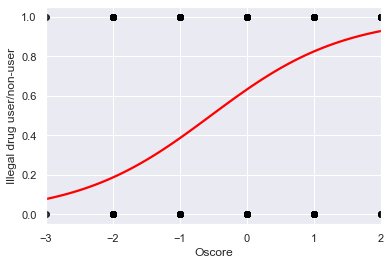

In [45]:
sns.regplot(x=drug_consumption_ml['Oscore'].astype('int'), y=Y, data=drug_consumption_ml, logistic=True, ci=None,scatter_kws={'color': 'black'}, line_kws={'color': 'red'});

In [46]:
algo=LogisticRegression(C=0, penalty='none')
algo.fit(X_train, y_train)
pred = algo.predict(X_test)
accuracy_lr=accuracy_score(y_test, pred)
f_score_lr=f1_score(y_test, pred, average='binary')
recall_lr=recall_score(y_test, pred)
precision_lr=precision_score(y_test, pred)
print('Logistic Regression Accuracy : {0:4f} %'.format(accuracy_score(y_test, pred)*100))

Logistic Regression Accuracy : 85.393258 %


In [47]:
#LogisticRegression().get_params().keys()
def grid_lr():
  grid_params={"C":[0,1,2,3,4],
               "penalty":["l1","l2", 'elasticnet', 'none']}
  grid = GridSearchCV(LogisticRegression(), grid_params, cv=3,n_jobs=-1,scoring='accuracy')            
  grid.fit(X_train,y_train)
  return(grid.best_score_,grid.best_estimator_)

With the grid_lr() method performing a gridsearch we foud out that the best hyperparameters were (C=0, penalty='none')

# Linear SVC

The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is.

In [48]:
algo=LinearSVC(C=2)
algo.fit(X_train, y_train)
pred = algo.predict(X_test)
accuracy_linearsvc=accuracy_score(y_test, pred)
f_score_linearsvc=f1_score(y_test, pred, average='binary')
recall_linearsvc=recall_score(y_test, pred)
precision_linearsvc=precision_score(y_test, pred)
print('Logistic Regression Accuracy : {0:4f} %'.format(accuracy_score(y_test, pred)*100))

Logistic Regression Accuracy : 85.393258 %


In [49]:
#LinearSVC().get_params().keys()
def grid_linearsvc():
  grid_params={"C":[0,1,2,3,4],
               "penalty":["l1","l2"],
               "loss":["hinge","squared_hinge"],}
  grid = GridSearchCV(LinearSVC(), grid_params, cv=3,n_jobs=-1)            
  grid.fit(X_train,y_train)
  return(grid.best_score_,grid.best_estimator_)

# Random Forest


The random forest is a classification technique that uses numerous decision trees to classify data. When creating each individual tree, it employs bagging and feature randomization in order to generate an uncorrelated forest of trees whose committee prediction is more accurate than that of any one tree.

In [50]:
algo=RandomForestClassifier(ccp_alpha=0.001, max_depth=9, max_features='log2',n_estimators=200)
# #ccp_alpha=0.002, max_depth=7, max_features='sqrt',min_samples_split=3
#random.seed(10)
algo.fit(X_train, y_train)
pred = algo.predict(X_test)
accuracy_RFC=accuracy_score(y_test, pred)
f_score_RFC=f1_score(y_test, pred, average='binary')
recall_RFC=recall_score(y_test, pred)
precision_RFC=precision_score(y_test, pred)

print('Logistic Regression Accuracy : {0:4f} %'.format(accuracy_score(y_test, pred)*100))

Logistic Regression Accuracy : 85.232745 %


In [51]:
#RandomForestClassifier().get_params().keys()
def grid_rf():
  grid_params={
              'n_estimators':np.arange(100,501,100)
              # 'max_features': ['auto', 'sqrt', 'log2'],
              # 'min_samples_split':[2,3,5],
              # 'min_samples_leaf':[1,5,8],
              # 'ccp_alpha': [0.1, .01, .001,0.002,0.005],
              # 'max_depth' : [1,2,3,4,5, 6, 7, 8, 9]
               }
  grid = GridSearchCV(RandomForestClassifier(ccp_alpha=0.001, max_depth=9, max_features='log2'), grid_params, cv=3,n_jobs=-1,scoring='accuracy')            
  grid.fit(X_train,y_train)
  return(grid.best_score_,grid.best_estimator_)

# Decision Tree

A decision tree is a type of prediction algorithm that operates by asking the inputted data a binary question. Then, depending on the response, it leads to a follow-up inquiry or a final categorization function.

In [52]:
clf_dtc = DecisionTreeClassifier(ccp_alpha=0.002, max_depth=7, max_features='log2',
                        min_samples_leaf=5, min_samples_split=3)
#best ccp_alpha=0.001, max_depth=8, max_features='auto',min_samples_leaf=4,criterion='gini'
clf_dtc.fit(X_train, y_train)
pred = clf_dtc.predict(X_test)

In [53]:
accuracy_dt = accuracy_score(y_test,pred)
f_score_dt=f1_score(y_test, pred, average='binary')
recall_dt=recall_score(y_test, pred, average='binary')
precision_dt=precision_score(y_test, pred, average='binary')
print("Accuracy: %.2f%%" % (accuracy_dt * 100.0))

Accuracy: 81.38%


In [54]:
#DecisionTreeClassifier().get_params().keys()
def grid_dt():
  tree_param = {
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split':[2,3,5],
              'min_samples_leaf':[1,5,8],
              'ccp_alpha': [0.1, .01, .001,0.002,0.005],
              'max_depth' : [1,2,3,4,5, 6, 7, 8, 9],
              'criterion' :['gini']}
  clf=GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)            
  clf.fit(X_train,y_train)
  return(clf.best_score_,clf.best_estimator_)

With the grid_dt() method performing a gridsearch we foud out that the best hyperparameters were (ccp_alpha=0.002, max_depth=7, max_features='log2', min_samples_leaf=5, min_samples_split=3)

# KNN

A k-nearest-neighbor algorithm is a data categorization method that assesses how likely a data point is to belong to one of two groups based on which group the data points closest to it belong to.

In [55]:
clf = KNeighborsClassifier(metric='manhattan', weights='distance',p=1,n_neighbors=10)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

In [56]:
accuracy_knn = accuracy_score(y_test,pred)
f_score_knn=f1_score(y_test, pred, average='binary')
recall_knn=recall_score(y_test, pred, average='binary')
precision_knn=precision_score(y_test, pred, average='binary')
print("Accuracy: %.2f%%" % (accuracy_knn * 100.0))

Accuracy: 83.31%


In [57]:
#KNeighborsClassifier().get_params().keys()
def grid_knn():
  grid_params={'n_neighbors':[3,5,10],
             'leaf_size':[30,50,100],
             'weights':['uniform','distance'],
             'metric':['euclidean','manhattan'],
             'p':[1,2]}
  grid = GridSearchCV(KNeighborsClassifier(), grid_params, cv=3,n_jobs=-1,scoring='accuracy')            
  grid.fit(X_train,y_train)
  return(grid.best_score_,grid.best_estimator_)

# SVM

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. The advantages of support vector machines are: Effective in high dimensional spaces. 

In [58]:
svm = SVC(kernel="rbf", C=0.1, gamma=0.01)
svm.fit(X_train,y_train)
pred = svm.predict(X_test)

In [59]:
accuracy_svm = accuracy_score(y_test,pred)
f_score_svm=f1_score(y_test, pred, average='binary')
recall_svm=recall_score(y_test, pred, average='binary')
precision_svm=precision_score(y_test, pred, average='binary')
print("Accuracy: %.2f%%" % (accuracy_svm * 100.0))

Accuracy: 85.07%


In [60]:
# C: It is the regularization parameter, C, of the error term.
# kernel: It specifies the kernel type to be used in the algorithm. It can be ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’, or callable. The default value is ‘rbf’.
# degree: It is the degree of the polynomial kernel function (‘poly’) and is ignored by all other kernels. The default value is 3.
# gamma: It is the kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’. If gamma is ‘auto’, then 1/n_features will be used instead.

def grid_svc():
  parameters = {
    'C':[0.1,1,100,1000], 
    'kernel':['rbf'],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
  grid=GridSearchCV(SVC(),parameters,n_jobs=-1)
  grid.fit(X_train,y_train)
  return(grid.best_score_,grid.best_estimator_) 

# The best model?? 

In [61]:
score_dico={
    'Logistic Regression':[accuracy_lr,f_score_lr,recall_lr,precision_lr],
    'Linear SVC':[accuracy_linearsvc,f_score_linearsvc,recall_linearsvc,precision_linearsvc],
    'Random forest classifier':[accuracy_RFC,f_score_RFC,recall_RFC,precision_RFC],
    'Decision Tree classifier':[accuracy_dt,f_score_dt,recall_dt,precision_dt],
    'KNN':[accuracy_knn,f_score_knn,recall_knn,precision_knn],
   }  

In [62]:
dataframe=pd.DataFrame.from_dict(score_dico,orient='index')
#dataframe.index/dataframe.values
dataframe.sort_values(by=2,ascending=True,inplace=True)
dataframe.rename(columns={0: 'Accuracy',1:'F_score',2:'Recall',3:'Precision'},inplace=True)
dataframe

Accuracy   F_score    Recall  Precision
KNN                       0.833066  0.861333  0.841146   0.882514
Decision Tree classifier  0.813804  0.848564  0.846354   0.850785
Linear SVC                0.853933  0.881664  0.882812   0.880519
Logistic Regression       0.853933  0.881971  0.885417   0.878553
Random forest classifier  0.852327  0.881137  0.888021   0.874359

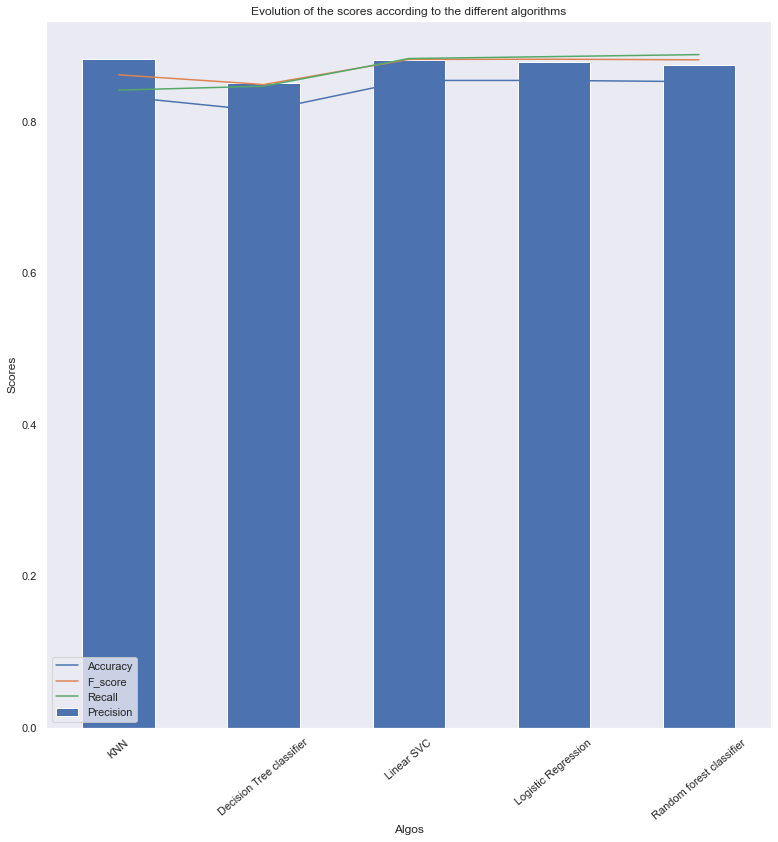

In [64]:
ax = plt.gca()
plt.rcParams["figure.figsize"] = (15,15)
plt.title("Evolution of the scores according to the different algorithms")
plt.subplot()
#Courbes
dataframe.plot(kind='line', y='Accuracy',ax=ax)
dataframe.plot(kind='line', y='F_score',ax=ax)
dataframe.plot(kind='line', y='Recall',ax=ax)
dataframe.plot(kind='bar', y='Precision',ax=ax)
plt.xticks(range(len(dataframe.index)), dataframe.index,rotation=40)
#labels
plt.ylabel('Scores')
plt.xlabel('Algos')
#plot
plt.grid()
plt.show()


The purpose of our forecasts is to predict whether someone will be a drug user or not. Especially, we want our algorithm to allow professionals such as psychologists etc. to identify actual users or futur ones. To do so, we aim to lower the False positives rate and maximize our recall. However, we'll also keep an eye on other measures like accuracy, precision, and, as a result, the f1-score (wich is the report between recall and precision)

As we can analyse the best results from our Machine learning exploration were on with the KNN , then the Linear SVC and finally the Logistic Regression.